<a href="https://colab.research.google.com/github/r-hedayati/PublicData/blob/main/PublicData_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving outbreakPlaces.csv to outbreakPlaces.csv


In [ ]:
import io
temp_df= pd.read_excel(io.BytesIO(uploaded['RMT23119 Output 2021-01-28.xlsx']), sheet_name='MAIN', index_col=None, header=0)

temp_df.columns= temp_df.columns.str.lower()
temp_df

,studyid,age,sex,year_month,zone_name,sshx_data_abn_lung_asc,sshx_data_altered_mental_state,sshx_data_anorexia,sshx_data_arthralgia,sshx_data_chest_pain,sshx_data_feverish_chills,sshx_data_conjunctivital_injecti,sshx_data_conjunctivitis,sshx_data_cough,sshx_data_decreased_appetite,sshx_data_diarrhea,sshx_data_dizziness,sshx_data_encephalitis,sshx_data_fever,sshx_data_headache,sshx_data_hypotension,sshx_data_irritability_cnfsn,sshx_data_loss_of_taste_smell,sshx_data_malaise,sshx_data_myalgia,sshx_data_nasal_congestion,sshx_data_nausea,sshx_data_nose_bleed,sshx_data_pain,sshx_data_pharyngeal_exudate,sshx_data_prostration,sshx_data_rhinorrhea,sshx_data_seizures,sshx_data_difficulty_breathing,sshx_data_sneezing,sshx_data_sore_throat,sshx_data_tachypnea,sshx_data_vomiting,sshx_data_other,signsymphx_if_other,ch_mi,ch_chf,ch_pvd,ch_cevd,ch_dementia,ch_cpd,ch_rheumatic,ch_pud,ch_paraplegia,ch_rd,ch_cancer,ch_mets,diabetes,liver,hosp_flag,flag_ed,ed_days,ed_mrdx,death_days,travel
0,1,40,F,2020_04,CALGARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,anosmia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,2,44,F,2020_09,EDMONTON,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,20,F,2020_08,EDMONTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,4,28,F,2020_09,CALGARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,61,F,2020_08,CALGARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16974,16975,37,F,2020_09,CALGARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
16975,16976,22,M,2020_04,CALGARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
16976,16977,49,F,2020_05,CALGARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
16977,16978,96,M,2020_06,CALGARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,U071,23.0,NaN


In [ ]:
x=temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16979 entries, 0 to 16978
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   studyid                           16979 non-null  int64  
 1   age                               16979 non-null  int64  
 2   sex                               16979 non-null  object 
 3   year_month                        16979 non-null  object 
 4   zone_name                         16915 non-null  object 
 5   sshx_data_abn_lung_asc            50 non-null     object 
 6   sshx_data_altered_mental_state    124 non-null    object 
 7   sshx_data_anorexia                242 non-null    object 
 8   sshx_data_arthralgia              502 non-null    object 
 9   sshx_data_chest_pain              748 non-null    object 
 10  sshx_data_feverish_chills         3590 non-null   object 
 11  sshx_data_conjunctivital_injecti  26 non-null     object 
 12  sshx

NoneType

Cleaning and size reducing **public_covid_cases**

In [ ]:
import io
covid_history_df = pd.read_csv(io.BytesIO(uploaded['public_covid_cases.csv']))
covid_history_df.sort_values(by=['location'], inplace=True)
covid_history_df.drop(['map_type', 'geometry_polygon','sort_order'], axis=1, inplace=True)
covid_history_df=covid_history_df[covid_history_df['location'].str.contains(r'Edmonton') | covid_history_df['location'].str.contains(r'Calgary')]
covid_history_df_edmonton=covid_history_df[covid_history_df['location'].str.contains(r'Edmonton')]
covid_history_df_calgary=covid_history_df[covid_history_df['location'].str.contains(r'Calgary')]
#print(covid_history_df_edmonton['location'].unique())
#print(covid_history_df_calgary[covid_history_df_calgary['location']=='Calgary - Nosehill'])
covid_history_df_calgary['location'].replace({'Calgary - Centre': 'Centre'  ,'Calgary - Centre North': 'Centre North', 'Calgary - Centre West': 'Centre West',
                                              'Calgary - East': 'East', 'Calgary - Elbow': 'Elbow', 'Calgary - Elbow (& Nearby Neighbourhoods)': 'Elbow', 'Calgary - Fish Creek': 'Fish Creek',
                                              'Calgary - Fish Creek (& Nearby Neighbourhoods)': 'Fish Creek', 'Calgary - Lower Ne': 'Lower NE','Calgary - Lower Nw': 'Lower NW', 'Calgary - North': 'North', 'Calgary - Nose Hill': 'Nosehill',
                                              'Calgary - Nose Hill (& Nearby Neighbourhoods)': 'Nosehill', 'Calgary - Nosehill': 'Nosehill', 'Calgary - Se': 'SE', 'Calgary - Sw': 'SW', 'Calgary - Upper Ne': 'Upper NE',
                                              'Calgary - Upper Nw': 'Upper NW', 'Calgary - West': 'West', 'Calgary - West Bow': 'West Bow',  'Calgary - West Bow (& Nearby Neighbourhoods)': 'West Bow' }, inplace=True)

covid_history_df_edmonton['location'].replace({'Edmonton - Abbottsfield': 'Abbottsfield', 'Edmonton - Abbottsfield (& Nearby Neighbourhoods)': 'Abbottsfield', 'Edmonton - Bonnie Doon': 'Bonnie Doon',
                                               'Edmonton - Bonnie Doon (& Nearby Neighbourhoods)': 'Bonnie Doon', 'Edmonton - Castle Downs': 'Castle Downs', 'Edmonton - Castle Downs (& Nearby Neighbourhoods)': 'Castle Downs',
                                               'Edmonton - Duggan': 'Duggan', 'Edmonton - Duggan (& Nearby Neighbourhoods)': 'Duggan', 'Edmonton - Eastwood': 'Eastwood',
                                               'Edmonton - Eastwood (& Nearby Neighbourhoods)': 'Eastwood', 'Edmonton - Jasper Place': 'Jasper Place', 'Edmonton - Jasper Place (& Nearby Neighbourhoods)': 'Jasper Place',
                                               'Edmonton - Mill Woods South & East': 'Mill Woods South & East', 'Edmonton - Mill Woods West': 'Mill Woods West', 'Edmonton - Ne': 'NE', 'Edmonton - Northgate': 'Northgate',
                                               'Edmonton - Northgate (& Nearby Neighbourhoods)': 'Northgate', 'Edmonton - Rutherford': 'Rutherford','Edmonton - Rutherford (& Nearby Neighbourhoods)': 'Rutherford',
                                               'Edmonton - Twin Brooks': 'Twin Brooks', 'Edmonton - Twin Brooks (& Nearby Neighbourhoods)': 'Twin Brooks','Edmonton - West Jasper Place': 'West Jasper Place', 
                                               'Edmonton - West Jasper Place (& Nearby Neighbourhoods)': 'West Jasper Place', 'Edmonton - Woodcroft East': 'Woodcroft East', 'Edmonton - Woodcroft East (& Nearby Neighbourhoods)': 'Woodcroft East',
                                               'Edmonton - Woodcroft West': 'Woodcroft West', 'Edmonton - Woodcroft West (& Nearby Neighbourhoods)': 'Woodcroft West'  }, inplace=True)


KeyError: ignored

Saving Calgary and Edmonton Data for future use 

In [ ]:
from google.colab import drive
drive.mount('/drive')
covid_history_df_calgary.to_csv('/drive/My Drive/Colab Notebooks/calgary_covid',index=False)
covid_history_df_edmonton.to_csv('/drive/My Drive/Colab Notebooks/edmonton_covid',index=False)

KeyboardInterrupt: ignored

In [3]:
#CALGARY
url_ca='https://raw.githubusercontent.com/r-hedayati/PublicData/84a60b74d4eb97ad3f71650ea50f844dae467937/input/calgary_covid.csv'
covid_history_df_calgary=pd.read_csv(url_ca)
covid_history_df_calgary

#EDMONTON
url_ed='https://raw.githubusercontent.com/r-hedayati/PublicData/84a60b74d4eb97ad3f71650ea50f844dae467937/input/edmonton_covid.csv'
covid_history_df_edmonton=pd.read_csv(url_ed)
covid_history_df_edmonton

,date,location,cases_total,cases_active,cases_recovered,deaths
0,2020/05/21,City Of Edmonton,374,52.0,311.0,11.0
1,2020/10/06,City Of Edmonton,5324,980.0,4266.0,78.0
2,2021/05/13,City Of Edmonton,58307,3926.0,53512.0,869.0
3,2021/01/24,City Of Edmonton,41437,2642.0,38098.0,697.0
4,2020/07/13,City Of Edmonton,1065,169.0,877.0,19.0
...,...,...,...,...,...,...
5446,2021/01/09,Woodcroft West,1014,132.0,874.0,8.0
5447,2020/08/27,Woodcroft West,55,3.0,51.0,1.0
5448,2020/09/21,Woodcroft West,74,9.0,64.0,1.0
5449,2021/01/29,Woodcroft West,1108,58.0,1035.0,15.0


In [4]:
#CALGARY
covid_history_df_calgary.sort_values(by=['date', 'location'], inplace=True)
#covid_history_df_calgary[covid_history_df_calgary['location']=='Elbow']
calgary_regions=covid_history_df_calgary['location'].unique()
covid_last_date_calgary=covid_history_df_calgary.tail(len(calgary_regions))
covid_last_date_calgary.drop(columns='date', inplace=True)
covid_last_date_calgary.reset_index(drop=True, inplace=True)
covid_last_date_calgary.rename(columns={'location': 'local health area', 'cases_total': 'total cases', 'cases_active': 'active cases', 'cases_recovered': 'recovered cases'}, inplace=True)
covid_last_date_calgary
#covid_history_df_calgary.groupby(['location']).sum()
#covid_history_df_calgary['cases_active'].groupby(covid_history_df_calgary['location']).size()
#plt.figure(figsize=(35,10))
#plt.plot(covid_history_df_calgary['date'],covid_history_df_calgary['cases_active'],linewidth=4, color='r', label='Active cases')



#EDMONTON
covid_history_df_edmonton.sort_values(by=['date', 'location'], inplace=True)
edmonton_regions=covid_history_df_edmonton['location'].unique()
covid_last_date_edmonton=covid_history_df_edmonton.tail(len(edmonton_regions))
covid_last_date_edmonton.drop(columns='date', inplace=True)
covid_last_date_edmonton.reset_index(drop=True, inplace=True)
covid_last_date_edmonton.rename(columns={'location': 'local health area', 'cases_total': 'total cases', 'cases_active': 'active cases', 'cases_recovered': 'recovered cases'}, inplace=True)
covid_last_date_edmonton


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,local health area,total cases,active cases,recovered cases,deaths
0,Abbottsfield,781,34.0,737.0,10.0
1,Bonnie Doon,3639,56.0,3477.0,106.0
2,Castle Downs,5450,142.0,5286.0,22.0
3,City Of Edmonton,60473,1532.0,58052.0,889.0
4,Duggan,1902,55.0,1778.0,69.0
5,Eastwood,4123,102.0,3899.0,122.0
6,Jasper Place,2777,88.0,2553.0,136.0
7,Mill Woods South & East,6295,191.0,6065.0,39.0
8,Mill Woods West,3201,61.0,3096.0,44.0
9,NE,6141,161.0,5915.0,65.0


Preprocessing **COVID-19 Vaccine data**

In [5]:
url_vaccine='https://raw.githubusercontent.com/r-hedayati/PublicData/main/covid_vaccine.csv'
covid_vaccine_df=pd.read_csv(url_vaccine)
covid_vaccine_df.drop(columns=['local_code','zone_name'], inplace=True)


#CALGARY
covid_vaccine_calgary=covid_vaccine_df[covid_vaccine_df['location_name'].str.contains(r'CALGARY')]
covid_vaccine_calgary.sort_values(by=['date','location_name'], inplace=True)
covid_vaccine_calgary['location_name'].replace({'CALGARY - CENTRE': 'Centre'  ,'CALGARY - CENTRE NORTH': 'Centre North', 'CALGARY - CENTRE WEST': 'Centre West',
                                              'CALGARY - EAST': 'East', 'CALGARY - ELBOW': 'Elbow', 'CALGARY - FISH CREEK': 'Fish Creek',
                                               'CALGARY - LOWER NE': 'Lower NE','CALGARY - LOWER NW': 'Lower NW','CALGARY - NORTH': 'North', 
                                                'CALGARY - NOSE HILL': 'Nosehill', 'CALGARY - SE': 'SE', 'CALGARY - SW': 'SW', 
                                                'CALGARY - UPPER NE': 'Upper NE', 'CALGARY - UPPER NW': 'Upper NW',
                                                'CALGARY - WEST': 'West', 'CALGARY - WEST BOW': 'West Bow' }, inplace=True)

covid_vaccine_calgary
covid_vaccine_calgary_last_date=covid_vaccine_calgary[(covid_vaccine_calgary['date']=='2021/06/02') & (covid_vaccine_calgary['age_group']=='ALL years')]
covid_vaccine_calgary_last_date.rename(columns={'location_name': 'local health area', 'dose_1': 'dose 1', 'dose_2': 'dose 2', 'total_doses_administered': 'total dose administered'}, inplace=True)
sub_covid_vaccine_calgary_last_date=covid_vaccine_calgary_last_date[['local health area','dose 1', 'dose 2', 'total dose administered']]
covid_vaccine_calgary_last_date


#EDMONTON
covid_vaccine_edmonton=covid_vaccine_df[covid_vaccine_df['location_name'].str.contains(r'EDMONTON')]
covid_vaccine_edmonton.sort_values(by=['date','location_name'], inplace=True)
covid_vaccine_edmonton['location_name'].unique()
covid_vaccine_edmonton['location_name'].replace({'EDMONTON - ABBOTTSFIELD': 'Abbottsfield', 'EDMONTON - BONNIE DOON': 'Bonnie Doon',
       'EDMONTON - CASTLE DOWNS': 'Castle Downs', 'EDMONTON - DUGGAN': 'Duggan',
       'EDMONTON - EASTWOOD': 'Eastwood', 'EDMONTON - JASPER PLACE': 'Jasper Place',
       'EDMONTON - MILL WOODS SOUTH & EAST': 'Mill Woods South & East', 'EDMONTON - MILL WOODS WEST': 'Mill Woods West',
       'EDMONTON - NE': 'NE', 'EDMONTON - NORTHGATE': 'Northgate', 'EDMONTON - RUTHERFORD': 'Rutherford',
       'EDMONTON - TWIN BROOKS': 'Twin Brooks', 'EDMONTON - WEST JASPER PLACE': 'West Jasper Place',
       'EDMONTON - WOODCROFT EAST': 'Woodcroft East', 'EDMONTON - WOODCROFT WEST': 'Woodcroft West'}, inplace=True)
covid_vaccine_edmonton
covid_vaccine_edmonton_last_date=covid_vaccine_edmonton[(covid_vaccine_edmonton['date']=='2021/06/02') & (covid_vaccine_edmonton['age_group']=='ALL years')]
covid_vaccine_edmonton_last_date.rename(columns={'location_name': 'local health area', 'dose_1': 'dose 1', 'dose_2': 'dose 2', 'total_doses_administered': 'total dose administered'}, inplace=True)
sub_covid_vaccine_edmonton_last_date=covid_vaccine_edmonton_last_date[['local health area','dose 1', 'dose 2', 'total dose administered']]
covid_vaccine_edmonton_last_date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingW

,date,local health area,population,age_group,dose 1,dose 2,total dose administered,percent_pop_1_plus_dose,percent_pop_fully_immunized
14162,2021/06/02,Abbottsfield,14626,ALL years,6904,1170,8074,47.2,8.0
14176,2021/06/02,Bonnie Doon,96846,ALL years,62581,11070,73651,64.6,11.4
14141,2021/06/02,Castle Downs,72888,ALL years,40272,6698,46970,55.3,9.2
14197,2021/06/02,Duggan,39991,ALL years,24806,4735,29541,62.0,11.8
14155,2021/06/02,Eastwood,72146,ALL years,37871,5764,43635,52.5,8.0
14127,2021/06/02,Jasper Place,47017,ALL years,26119,5130,31249,55.6,10.9
14190,2021/06/02,Mill Woods South & East,87320,ALL years,50327,5509,55836,57.6,6.3
14183,2021/06/02,Mill Woods West,51075,ALL years,28925,4399,33324,56.6,8.6
14169,2021/06/02,NE,92441,ALL years,47265,6599,53864,51.1,7.1
14148,2021/06/02,Northgate,83649,ALL years,45636,8726,54362,54.6,10.4


Import **Community Profile Data**


In [15]:
import io

profileURL='https://github.com/r-hedayati/PublicData/blob/84a60b74d4eb97ad3f71650ea50f844dae467937/input/CommunityProfileData.xlsx?raw=true'

mainDF=pd.read_excel(profileURL, sheet_name='Calgary', index_col=None, header=0 )
covidDF=pd.read_excel(profileURL, sheet_name='CalgaryCOVID', index_col=None, header=0 )
mainDF_edmonton=pd.read_excel(profileURL, sheet_name='Edmonton', index_col=None, header=0)
#mainDF = pd.read_excel(io.BytesIO(uploaded['CalgaryData.xlsx']), sheet_name='Calgary', index_col=None, header=0)
#covidDF = pd.read_excel(io.BytesIO(uploaded['CalgaryData.xlsx']), sheet_name='CalgaryCOVID', index_col=None, header=0)
#mainDF_edmonton= pd.read_excel(io.BytesIO(uploaded['CalgaryData.xlsx']), sheet_name='Edmonton', index_col=None, header=0)

mainDF.columns= mainDF.columns.str.lower()
covidDF.columns= covidDF.columns.str.lower()
mainDF_edmonton.columns=mainDF_edmonton.columns.str.lower()

mainDF.index
mainDF_edmonton.index

mainDF.head()
covidDF.head(20)
mainDF_edmonton['local health area'].unique()
mainDF

,name,local health area,population,age (0-14),age (15-64),age (65-84),age (85+),male,female,avg household size,non-immigrants,immigrants,recent immigrants,non pr,aboriginal,no certificate,high school,post-secondary,# of population over 15,labour participation rate,employement rate,driver+passenger,public transit,walked+bike,low income
0,beltline,Centre,20860,915,18420,1350,180,11270,9595,1.5,13575,6175,1965,1110,515,1260,3585,15105.0,19945.0,0.84,0.77,5965,1900.0,6355,3020
1,chinatown,Centre,1570,75,1000,330,165,745,830,1.5,415,1045,160,115,10,410,335,750.0,1500.0,0.56,0.52,255,165.0,325,490
2,downtown-east-village,Centre,1725,35,1265,395,30,940,780,1.4,1050,575,80,105,50,265,330,1100.0,1690.0,0.63,0.58,455,180.0,300,410
3,downtown-west-end,Centre,2105,115,1735,220,30,1110,990,1.6,1045,950,210,110,20,105,320,1560.0,1990.0,0.76,0.70,425,405.0,315,375
4,downtown-commercial-core,Centre,7547,765,6290,435,55,3970,3575,1.7,2790,3525,1775,1235,180,590,1350,4845.0,6780.0,0.77,0.69,1075,1720.0,1635,1865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Greenwood- Greenbriar,West Bow,905,95,610,195,10,490,415,1.8,830,75,0,0,60,235,315,265.0,810.0,0.59,0.53,375,30.0,0,135
193,Montgomery,West Bow,3975,615,2905,410,55,2055,1925,2.2,3145,660,150,175,265,380,745,2235.0,3360.0,0.73,0.66,1520,280.0,215,520
194,Parkdale,West Bow,1865,250,1370,210,45,890,975,2.2,1485,315,55,65,50,115,230,1270.0,1620.0,0.72,0.67,625,85.0,260,100
195,Point Mckay,West Bow,1275,45,915,295,20,610,665,1.6,1020,235,15,20,25,25,210,995.0,1230.0,0.68,0.62,455,80.0,125,95


Import **Outbreak data**

In [16]:
url_outbreak='https://raw.githubusercontent.com/r-hedayati/PublicData/84a60b74d4eb97ad3f71650ea50f844dae467937/input/outbreakPlaces.csv'
url_schools_outbreak = 'https://raw.githubusercontent.com/r-hedayati/PublicData/84a60b74d4eb97ad3f71650ea50f844dae467937/input/schoolsOutbreak.csv'

covid_outbreak_df=pd.read_csv(url_outbreak)
covid_schools_outbreak_df=pd.read_csv(url_schools_outbreak)

covid_outbreak_df.columns=covid_outbreak_df.columns.str.lower()
covid_schools_outbreak_df.columns=covid_schools_outbreak_df.columns.str.lower()
#print(covid_outbreak_df['local health area'].unique())


#CALGARY
covid_outbreak_calgary=covid_outbreak_df[covid_outbreak_df['zone']=='Calgary']
#covid_outbreak_calgary['local health area'].unique()
covid_schools_outbreak_calgary=covid_schools_outbreak_df[covid_schools_outbreak_df['region name']=='City Of Calgary']
city_of_calgary_region_list=['Centre', 'Centre North', 'Centre West', 'East', 'Elbow', 'Fish Creek', 'Lower NE', 'Lower NW', 'North', 
                             'Nosehill', 'SE', 'SW', 'Upper NE', 'Upper NW', 'West', 'West Bow']

covid_outbreak_calgary=covid_outbreak_calgary[covid_outbreak_calgary['local health area'].isin(city_of_calgary_region_list)]
covid_schools_outbreak_calgary=covid_schools_outbreak_calgary[covid_schools_outbreak_calgary['local health area'].isin(city_of_calgary_region_list)]

temp_df=covid_outbreak_calgary.groupby('local health area').count()['name'].to_frame().rename(columns={'name': '# of outbreaks'})
covid_outbreak_calgary=covid_outbreak_calgary.merge(temp_df, on='local health area')
sub_covid_outbreak_calgary=covid_outbreak_calgary.drop(columns=['name', 'zone', 'facilities'])


temp_df=covid_schools_outbreak_calgary.groupby('local health area').sum()['num_ord'].to_frame().rename(columns={'num_ord': '# of outbreaks(schools)'})
covid_schools_outbreak_calgary=covid_schools_outbreak_calgary.merge(temp_df, on='local health area')
sub_covid_schools_outbreak_calgary=covid_schools_outbreak_calgary.drop(columns=['region name', 'school status', 'schools details', 'num_ord'])


test=sub_covid_outbreak_calgary.groupby('local health area')
test2=sub_covid_schools_outbreak_calgary.groupby('local health area')
#print(test.first())
#print(test2.first())
outbreak_df=(test.first()['# of outbreaks']+test2.first()['# of outbreaks(schools)']).to_frame(name='# of total outbreaks').reset_index()
outbreak_df

#EDMONTON
covid_outbreak_edmonton=covid_outbreak_df[covid_outbreak_df['zone']=='Edmonton']
covid_schools_outbreak_edmonton=covid_schools_outbreak_df[covid_schools_outbreak_df['region name']=='City Of Edmonton']

city_of_edmonton_region_list=['Abbottsfield', 'Bonnie Doon', 'Castle Downs', 'Duggan', 'Eastwood', 'Jasper Place', 'Mill Woods South & East', 'Mill Woods West', 'NE',
 'Northgate', 'Rutherford', 'Twin Brooks', 'West Jasper Place', 'Woodcroft East', 'Woodcroft West'] 

covid_outbreak_edmonton=covid_outbreak_edmonton[covid_outbreak_edmonton['local health area'].isin(city_of_edmonton_region_list)]
covid_schools_outbreak_edmonton=covid_schools_outbreak_edmonton[covid_schools_outbreak_edmonton['local health area'].isin(city_of_edmonton_region_list)]

temp_df_edmonton=covid_outbreak_edmonton.groupby('local health area').count()['name'].to_frame().rename(columns={'name': '# of outbreaks'})
covid_outbreak_edmonton=covid_outbreak_edmonton.merge(temp_df_edmonton, on='local health area')
sub_covid_outbreak_edmonton=covid_outbreak_edmonton.drop(columns=['name', 'zone', 'facilities'])

temp_df_edmonton=covid_schools_outbreak_edmonton.groupby('local health area').sum()['num_ord'].to_frame().rename(columns={'num_ord': '# of outbreaks(schools)'})
covid_schools_outbreak_edmonton=covid_schools_outbreak_edmonton.merge(temp_df_edmonton, on='local health area')
sub_covid_schools_outbreak_edmonton=covid_schools_outbreak_edmonton.drop(columns=['region name', 'school status', 'schools details', 'num_ord'])


test=sub_covid_outbreak_edmonton.groupby('local health area')
test2=sub_covid_schools_outbreak_edmonton.groupby('local health area')
outbreak_df_edmonton=(test.first()['# of outbreaks']+test2.first()['# of outbreaks(schools)']).to_frame(name='# of total outbreaks').reset_index()
outbreak_df_edmonton.fillna(value=0, inplace=True)
outbreak_df_edmonton

,local health area,# of total outbreaks
0,Bonnie Doon,0.0
1,Castle Downs,5.0
2,Duggan,8.0
3,Eastwood,7.0
4,Jasper Place,2.0
5,Mill Woods South & East,7.0
6,Mill Woods West,4.0
7,NE,6.0
8,Northgate,11.0
9,Rutherford,16.0


Creating Calgary data based on local health area

In [17]:
#mainDF.info()
#print(mainDF.columns)
columns_pop=['population', 'age (0-14)', 'age (15-64)',
       'age (65-84)', 'age (85+)', 'male', 'female', 
       'non-immigrants', 'immigrants', 'recent immigrants', 'non pr',
       'aboriginal', 'no certificate', 'high school', 'post-secondary',
       '# of population over 15', 'driver+passenger', 'public transit', 'walked+bike',
       'low income']
columns_avg=['avg household size', 'labour participation rate', 'employement rate']
columns_covid=['dose 1', 'dose 2', 'total dose administered', '# of total outbreaks']

temp=[]
for col in columns_pop:
  temp.append(mainDF.groupby('local health area')[col].sum())

for col in columns_avg:
  temp.append(mainDF.groupby('local health area')[col].mean())

communityDF=pd.DataFrame(temp)
communityDF=communityDF.T
#inputDF=pd.merge(communityDF, covidDF, on='local health area', how='outer')
inputDF=pd.merge(communityDF, covid_last_date_calgary, on='local health area', how='outer')
inputDF=pd.merge(inputDF, sub_covid_vaccine_calgary_last_date, on='local health area', how='outer')
inputDF=pd.merge(inputDF, outbreak_df, on='local health area', how='outer')
inputDF.reset_index


#mainDF.at['Total',['local health area', 'name']]='City of Calgary'
inputDF.at[16, columns_pop]=inputDF[columns_pop].sum()
inputDF.at[16, columns_avg]=inputDF[columns_avg].mean()
inputDF.at[16, columns_covid]=inputDF[columns_covid].sum()
#inputDF.describe()
inputDF.head(20)

#inputMatrix=inputDF.corr()
#corr_pairs_input=inputMatrix.unstack()
#print(corr_pairs_input['total cases'].sort_values(kind="quicksort"))


,local health area,population,age (0-14),age (15-64),age (65-84),age (85+),male,female,non-immigrants,immigrants,recent immigrants,non pr,aboriginal,no certificate,high school,post-secondary,# of population over 15,driver+passenger,public transit,walked+bike,low income,avg household size,labour participation rate,employement rate,total cases,active cases,recovered cases,deaths,dose 1,dose 2,total dose administered,# of total outbreaks
0,Centre,50992.0,3425.0,42655.0,4245.0,680.0,26680.0,24300.0,31955.0,15845.0,5185.0,3220.0,1465.0,3635.0,9290.0,34640.0,47580.00,14230.0,6100.0,11580.0,8275.0,1.830769,0.745385,0.675385,3705,111.0,3579.0,15.0,42079.0,5206.0,47285.0,16.0
1,Centre North,38900.0,5085.0,29830.0,3520.0,470.0,19170.0,19725.0,30170.0,7620.0,1530.0,1100.0,1150.0,2570.0,6810.0,24440.0,33820.00,12700.0,3395.0,5395.0,4140.0,2.111111,0.748889,0.682222,2132,37.0,1997.0,98.0,29825.0,5376.0,35201.0,6.0
2,Centre West,59540.0,9445.0,43885.0,5470.0,755.0,29065.0,30490.0,46525.0,11730.0,3205.0,1295.0,1985.0,4695.0,11725.0,33700.0,50120.00,24635.0,5185.0,3155.0,6410.0,2.235714,0.755714,0.694286,3010,80.0,2905.0,25.0,42362.0,7170.0,49532.0,17.0
3,East,64245.0,11305.0,45785.0,6610.0,540.0,33300.0,30940.0,55920.0,19515.0,4950.0,1390.0,4025.0,14755.0,17340.0,20845.0,52920.00,25430.0,5155.0,995.0,9750.0,2.622222,0.695556,69.993333,4663,181.0,4408.0,74.0,36124.0,4907.0,41031.0,19.0
4,Elbow,50890.0,7000.0,36390.0,8595.0,890.0,25310.0,25590.0,38910.0,10845.0,2185.0,1155.0,1190.0,4055.0,10240.0,29635.0,43920.00,18800.0,3215.0,3275.0,3830.0,2.430435,0.681304,0.618696,1855,51.0,1769.0,35.0,27189.0,6367.0,33556.0,7.0
5,Fish Creek,105190.0,15840.0,72920.0,14890.0,1585.0,52440.0,52740.0,80390.0,23025.0,5100.0,1780.0,3570.0,10865.0,25340.0,53160.0,89360.00,41580.0,7750.0,2295.0,8675.0,2.447368,0.702632,0.634211,4373,169.0,4162.0,42.0,69524.0,12409.0,81933.0,29.0
6,Lower NE,86115.0,16350.0,59565.0,9445.0,745.0,43690.0,42440.0,48895.0,35850.0,9340.0,1370.0,3300.0,16815.0,23080.0,25944.6,60820.35,31840.0,6824.4,915.0,11865.0,2.988889,0.682222,0.608889,7832,270.0,7538.0,24.0,49830.0,7042.0,56872.0,26.0
7,Lower NW,58890.0,11470.0,39500.0,7140.0,775.0,29025.0,29860.0,42665.0,30680.0,3020.0,1755.0,1000.0,4040.0,9970.0,33415.0,47420.00,20275.0,4320.0,1840.0,4020.0,2.728571,0.680000,0.614286,2201,55.0,2131.0,15.0,42406.0,7566.0,49972.0,3.0
8,North,101290.0,22230.0,71375.0,7245.0,450.0,50355.0,50920.0,61705.0,38110.0,7730.0,1455.0,2400.0,11505.0,21455.0,46100.0,79075.00,42810.0,6845.0,1010.0,7625.0,2.877778,0.748889,0.685556,6246,215.0,6010.0,21.0,70975.0,8685.0,79660.0,20.0
9,Nosehill,72285.0,10620.0,52155.0,8145.0,1370.0,36657.0,35660.0,53705.0,16440.0,3840.0,2140.0,2470.0,8665.0,15895.0,37400.0,61650.00,26355.0,6780.0,3050.0,8520.0,2.355556,0.726111,0.650000,3343,133.0,3195.0,15.0,47986.0,7372.0,55358.0,23.0


Creating Calgary data 

In [18]:
synthetic_col=['local health area','population','active cases', 'recovered cases', 'total cases', 'deaths', 'dose 1', 'dose 2', 'total dose administered', '# of total outbreaks']
#input_df_new=inputDF['population'].to_frame().rename(columns={'population': 'pop_region'})
input_df_new=inputDF[synthetic_col].rename(columns={'population': 'population region'})
input_df_new=input_df_new.merge(mainDF, on='local health area')
#input_df_new=input_df_new.merge(sub_covid_vaccine_calgary_last_date, on='local health area')
input_df_new.insert(2,'population ratio',input_df_new['population']/input_df_new['population region'])

input_df_new


for item in synthetic_col[1:]:
  input_df_new[item]=round(input_df_new[item]*input_df_new['population ratio'])

calgary_data=input_df_new[['name','local health area', 'active cases',
       'recovered cases', 'total cases', 'deaths', 'dose 1', 'dose 2', 'total dose administered', '# of total outbreaks', 'population', 'population region', 'population ratio',
       'age (0-14)', 'age (15-64)', 'age (65-84)', 'age (85+)', 'male',
       'female', 'avg household size', 'non-immigrants', 'immigrants',
       'recent immigrants', 'non pr', 'aboriginal', 'no certificate',
       'high school', 'post-secondary', '# of population over 15',
       'labour participation rate', 'employement rate', 'driver+passenger',
       'public transit', 'walked+bike', 'low income']]
calgary_data

###Correlation Matrix
# ratioMatrix2=calgary_data.corr()
# corr_pairs2=ratioMatrix2.unstack()
# print(corr_pairs2['dose 1'].sort_values(kind="quicksort"))

,name,local health area,active cases,recovered cases,total cases,deaths,dose 1,dose 2,total dose administered,# of total outbreaks,population,population region,population ratio,age (0-14),age (15-64),age (65-84),age (85+),male,female,avg household size,non-immigrants,immigrants,recent immigrants,non pr,aboriginal,no certificate,high school,post-secondary,# of population over 15,labour participation rate,employement rate,driver+passenger,public transit,walked+bike,low income
0,beltline,Centre,45.0,1464.0,1516.0,6.0,17214.0,2130.0,19344.0,7.0,8533.0,50992.0,0.409084,915,18420,1350,180,11270,9595,1.5,13575,6175,1965,1110,515,1260,3585,15105.0,19945.0,0.84,0.77,5965,1900.0,6355,3020
1,chinatown,Centre,3.0,110.0,114.0,0.0,1296.0,160.0,1456.0,0.0,48.0,50992.0,0.030789,75,1000,330,165,745,830,1.5,415,1045,160,115,10,410,335,750.0,1500.0,0.56,0.52,255,165.0,325,490
2,downtown-east-village,Centre,4.0,121.0,125.0,1.0,1423.0,176.0,1600.0,1.0,58.0,50992.0,0.033829,35,1265,395,30,940,780,1.4,1050,575,80,105,50,265,330,1100.0,1690.0,0.63,0.58,455,180.0,300,410
3,downtown-west-end,Centre,5.0,148.0,153.0,1.0,1737.0,215.0,1952.0,1.0,87.0,50992.0,0.041281,115,1735,220,30,1110,990,1.6,1045,950,210,110,20,105,320,1560.0,1990.0,0.76,0.70,425,405.0,315,375
4,downtown-commercial-core,Centre,16.0,530.0,548.0,2.0,6228.0,771.0,6998.0,2.0,1117.0,50992.0,0.148004,765,6290,435,55,3970,3575,1.7,2790,3525,1775,1235,180,590,1350,4845.0,6780.0,0.77,0.69,1075,1720.0,1635,1865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,bowness,West Bow,10.0,488.0,506.0,7.0,7444.0,1570.0,9014.0,2.0,6198.0,18820.0,0.573858,1495,7920,1250,135,5350,5450,2.2,9060,1510,390,225,755,1705,2640,4960.0,9305.0,0.71,0.64,4310,750.0,375,1520
193,Greenwood- Greenbriar,West Bow,1.0,41.0,42.0,1.0,624.0,132.0,755.0,0.0,44.0,18820.0,0.048087,95,610,195,10,490,415,1.8,830,75,0,0,60,235,315,265.0,810.0,0.59,0.53,375,30.0,0,135
194,Montgomery,West Bow,4.0,180.0,186.0,3.0,2740.0,578.0,3318.0,1.0,840.0,18820.0,0.211211,615,2905,410,55,2055,1925,2.2,3145,660,150,175,265,380,745,2235.0,3360.0,0.73,0.66,1520,280.0,215,520
195,Parkdale,West Bow,2.0,84.0,87.0,1.0,1285.0,271.0,1557.0,0.0,185.0,18820.0,0.099097,250,1370,210,45,890,975,2.2,1485,315,55,65,50,115,230,1270.0,1620.0,0.72,0.67,625,85.0,260,100


Create Edmonton Data based on Local Health Area


In [19]:
#mainDF_edmonton.info()
#print(mainDF_edmonton.columns)

columns_pop=['population', 'age (0-14)', 'age (15-64)',
       'age (65-84)', 'age (85+)', 'male', 'female', 
       'non-immigrants', 'immigrants', 'recent immigrants', 'non pr',
       'aboriginal', 'no certificate', 'high school', 'post-secondary',
       '# of population over 15', 'driver+passenger', 'public transit', 'walked+bike',
       'low income']
columns_avg=['avg household size', 'labour participation rate', 'employement rate']
columns_covid=['dose 1', 'dose 2', 'total dose administered', '# of total outbreaks']

temp=[]
for col in columns_pop:
  temp.append(mainDF_edmonton.groupby('local health area')[col].sum())

for col in columns_avg:
  temp.append(mainDF_edmonton.groupby('local health area')[col].mean())



communityDF_edmonton=pd.DataFrame(temp)
communityDF_edmonton=communityDF_edmonton.T
#inputDF=pd.merge(communityDF, covidDF, on='local health area', how='outer')
inputDF_edmonton=pd.merge(communityDF_edmonton, covid_last_date_edmonton, on='local health area', how='outer')
inputDF_edmonton=pd.merge(inputDF_edmonton, sub_covid_vaccine_edmonton_last_date, on='local health area', how='outer')
inputDF_edmonton=pd.merge(inputDF_edmonton, outbreak_df_edmonton, on='local health area', how='outer')
inputDF_edmonton.reset_index

inputDF_edmonton.fillna(value=0, inplace=True)
#mainDF.at['Total',['local health area', 'name']]='City of Calgary'
inputDF_edmonton.at[15, columns_pop]=inputDF_edmonton[columns_pop].sum()
inputDF_edmonton.at[15, columns_avg]=inputDF_edmonton[columns_avg].mean()
inputDF_edmonton.at[15, columns_covid]=inputDF_edmonton[columns_covid].sum()
#inputDF.describe()
inputDF_edmonton

#fillna(value=0, inplace=True)
#inputMatrix=inputDF.corr()
#corr_pairs_input=inputMatrix.unstack()
#print(corr_pairs_input['total cases'].sort_values(kind="quicksort"))


,local health area,population,age (0-14),age (15-64),age (65-84),age (85+),male,female,non-immigrants,immigrants,recent immigrants,non pr,aboriginal,no certificate,high school,post-secondary,# of population over 15,driver+passenger,public transit,walked+bike,low income,avg household size,labour participation rate,employement rate,total cases,active cases,recovered cases,deaths,dose 1,dose 2,total dose administered,# of total outbreaks
0,Abbottsfield,13300.0,2605.0,8875.0,1585.0,245.0,6740.0,6565.0,10300.0,2795.0,675.0,210.0,1420.0,2750.0,3225.0,4705.0,10695.0,4590.0,770.0,170.0,2555.0,2.920000,64.200000,56.020000,781,34.0,737.0,10.0,6904.0,1170.0,8074.0,0.0
1,Bonnie Doon,89895.0,10675.0,66995.0,10440.0,1780.0,45500.0,44350.0,70415.0,14965.0,3940.0,4505.0,4815.0,8565.0,19580.0,51075.0,79210.0,34375.0,7795.0,6135.0,10245.0,2.667742,70.422581,64.693548,3639,56.0,3477.0,106.0,62581.0,11070.0,73651.0,0.0
2,Castle Downs,69790.0,14980.0,47605.0,6670.0,540.0,34535.0,35265.0,47365.0,21495.0,4215.0,960.0,3370.0,9875.0,16390.0,28545.0,54810.0,30020.0,3260.0,635.0,7355.0,3.065000,72.090000,66.840000,5450,142.0,5286.0,22.0,40272.0,6698.0,46970.0,5.0
3,Duggan,37480.0,6240.0,26235.0,4510.0,480.0,18540.0,18915.0,22745.0,12040.0,4530.0,2690.0,1500.0,3585.0,7730.0,19915.0,31230.0,12520.0,4335.0,1140.0,5495.0,2.616667,66.491667,60.425000,1902,55.0,1778.0,69.0,24806.0,4735.0,29541.0,8.0
4,Eastwood,57240.0,6440.0,44410.0,5575.0,780.0,29965.0,27260.0,38820.0,15705.0,4410.0,2705.0,5525.0,10310.0,13385.0,27080.0,50790.0,18875.0,6220.0,4505.0,11310.0,2.652941,68.641176,61.811765,4123,102.0,3899.0,122.0,37871.0,5764.0,43635.0,7.0
5,Jasper Place,93155.0,18380.0,64780.0,8935.0,1045.0,45885.0,47270.0,64310.0,27500.0,6070.0,1350.0,4260.0,9350.0,19535.0,45880.0,74770.0,41300.0,5370.0,1205.0,5825.0,3.012121,72.933333,68.387879,2777,88.0,2553.0,136.0,26119.0,5130.0,31249.0,2.0
6,Mill Woods South & East,66245.0,13975.0,46600.0,5355.0,305.0,33395.0,32845.0,40620.0,24255.0,6785.0,1340.0,2670.0,8180.0,15990.0,28125.0,52260.0,29205.0,3665.0,500.0,5160.0,3.073333,73.666667,66.846667,6295,191.0,6065.0,39.0,50327.0,5509.0,55836.0,7.0
7,Mill Woods West,39225.0,7985.0,26510.0,4295.0,445.0,19345.0,19875.0,23925.0,14095.0,4805.0,1195.0,1935.0,5850.0,9440.0,15970.0,31250.0,14680.0,2980.0,605.0,5550.0,2.961538,67.307692,60.300000,3201,61.0,3096.0,44.0,28925.0,4399.0,33324.0,4.0
8,NE,80730.0,16475.0,56710.0,7060.0,485.0,40095.0,40620.0,55630.0,23735.0,5695.0,1355.0,6120.0,12415.0,20280.0,31540.0,64245.0,32135.0,6675.0,970.0,9140.0,2.955556,72.511111,64.785185,6141,161.0,5915.0,65.0,47265.0,6599.0,53864.0,6.0
9,Northgate,71650.0,13220.0,48735.0,8610.0,1105.0,35860.0,35775.0,47935.0,22670.0,4070.0,1020.0,4870.0,13950.0,18645.0,25840.0,58445.0,28470.0,4395.0,875.0,9195.0,3.000000,67.036842,60.521053,5606,122.0,5410.0,74.0,45636.0,8726.0,54362.0,11.0


Create Edmonton Data

In [20]:
synthetic_col=['local health area','population','active cases', 'recovered cases', 'total cases', 'deaths', 'dose 1', 'dose 2', 'total dose administered', '# of total outbreaks']
#input_df_new=inputDF['population'].to_frame().rename(columns={'population': 'pop_region'})
input_df_new_edmonton=inputDF_edmonton[synthetic_col].rename(columns={'population': 'population region'})
input_df_new_edmonton=input_df_new_edmonton.merge(mainDF_edmonton, on='local health area')
#input_df_new=input_df_new.merge(sub_covid_vaccine_calgary_last_date, on='local health area')
input_df_new_edmonton.insert(2,'population ratio',input_df_new_edmonton['population']/input_df_new_edmonton['population region'])

input_df_new_edmonton


for item in synthetic_col[1:]:
  input_df_new_edmonton[item]=round(input_df_new_edmonton[item]*input_df_new_edmonton['population ratio'])

edmonton_data=input_df_new_edmonton[['name','local health area', 'active cases',
       'recovered cases', 'total cases', 'deaths', 'dose 1', 'dose 2', 'total dose administered', '# of total outbreaks', 'population', 'population region', 'population ratio',
       'age (0-14)', 'age (15-64)', 'age (65-84)', 'age (85+)', 'male',
       'female', 'avg household size', 'non-immigrants', 'immigrants',
       'recent immigrants', 'non pr', 'aboriginal', 'no certificate',
       'high school', 'post-secondary', '# of population over 15',
       'labour participation rate', 'employement rate', 'driver+passenger',
       'public transit', 'walked+bike', 'low income']]
edmonton_data

###Correlation Matrix
# ratioMatrix2=calgary_data.corr()
# corr_pairs2=ratioMatrix2.unstack()
# print(corr_pairs2['dose 1'].sort_values(kind="quicksort"))

,name,local health area,active cases,recovered cases,total cases,deaths,dose 1,dose 2,total dose administered,# of total outbreaks,population,population region,population ratio,age (0-14),age (15-64),age (65-84),age (85+),male,female,avg household size,non-immigrants,immigrants,recent immigrants,non pr,aboriginal,no certificate,high school,post-secondary,# of population over 15,labour participation rate,employement rate,driver+passenger,public transit,walked+bike,low income
0,ABBOTTSFIELD (2010) ( 9.9%),Abbottsfield,4.0,94.0,100.0,1.0,880.0,149.0,1029.0,0.0,216.0,13300.0,0.127444,450,1165,85,0,835,860,3.1,1035,540,175,120,175,330,415,495,1245,67.1,58.2,480,140,25,480.0
1,BEACON HEIGHTS (2040) ( 5.8%),Abbottsfield,7.0,156.0,165.0,2.0,1461.0,248.0,1709.0,0.0,596.0,13300.0,0.211654,330,2010,410,70,1445,1375,2.7,2295,515,45,10,315,750,770,960,2485,61.4,53.9,1075,165,45,360.0
2,BERGMAN (2090) ( 4.6%),Abbottsfield,4.0,90.0,95.0,1.0,841.0,143.0,983.0,0.0,197.0,13300.0,0.121805,280,1145,175,20,815,805,2.9,1335,285,30,0,80,320,400,615,1340,69.0,61.9,690,80,25,120.0
3,BEVERLY HEIGHTS (2100) ( 6.1%),Abbottsfield,9.0,197.0,209.0,3.0,1848.0,313.0,2161.0,0.0,953.0,13300.0,0.267669,585,2305,550,120,1815,1745,2.8,3075,465,70,20,400,640,840,1495,2975,61.2,53.6,1275,190,45,580.0
4,RUNDLE HEIGHTS (2660) ( 4.4%),Abbottsfield,9.0,200.0,212.0,3.0,1874.0,318.0,2192.0,0.0,980.0,13300.0,0.271429,960,2250,365,35,1830,1780,3.1,2560,990,355,60,450,710,800,1140,2650,62.3,52.5,1070,195,30,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,MAYFIELD (4290) ( 2.7%),Woodcroft West,3.0,119.0,123.0,1.0,1427.0,241.0,1668.0,1.0,149.0,28525.0,0.072217,325,1450,230,50,1065,990,2.8,1685,355,85,20,205,365,555,810,1730,69.9,65.0,915,140,10,210.0
273,TRUMPETER AREA (4471) ( 2.8%),Woodcroft West,2.0,69.0,71.0,1.0,828.0,140.0,968.0,1.0,50.0,28525.0,0.041893,245,900,50,0,615,585,2.8,1000,180,50,20,65,55,205,690,945,85.2,81.5,685,10,10,20.0
274,HAWKS RIDGE (4473) ( 0.0%),Woodcroft West,0.0,18.0,18.0,0.0,211.0,36.0,247.0,0.0,3.0,28525.0,0.010692,45,265,0,0,155,145,2.6,275,35,10,0,15,0,70,190,265,84.9,83.0,200,10,0,0.0
275,STARLING (4474) ( 3.6%),Woodcroft West,1.0,38.0,39.0,0.0,457.0,77.0,534.0,0.0,15.0,28525.0,0.023138,120,520,20,0,315,345,2.7,530,120,40,15,10,30,120,395,545,85.2,83.3,425,0,0,30.0


Saving Calgary and Edmonton Data


In [ ]:
from google.colab import drive
drive.mount('/drive')
calgary_data.to_csv('/drive/My Drive/Colab Notebooks/calgary_data',index=False)
inputDF.to_csv('/drive/My Drive/Colab Notebooks/calgary_data_LHA',index=False)

edmonton_data.to_csv('/drive/My Drive/Colab Notebooks/edmonton_data',index=False)
inputDF_edmonton.to_csv('/drive/My Drive/Colab Notebooks/edmonton_data_LHA',index=False)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [21]:

ratio=[]
covid_col=['total cases', 'death']
#print(communityDF)
for col in columns_pop:
  ratio.append(communityDF[col]/communityDF['population'])
#print(ratio[1:5])
#ratioDF=pd.DataFrame(ratio, index=columns_pop)
#ratioDF=ratioDF.T

#covidDeath exact value

#covidDeath=pd.DataFrame(covidDF['death'])
#covidDeath.set_index(covidDF['local health area'], inplace=True)
#covidDF.set_index(covidDF['local health area'], inplace=True)

for col in covid_col:
  ratio.append(covidDF[col]/communityDF['population'])

ratioDF=pd.DataFrame(ratio, index=['population', 'age (0-14)', 'age (15-64)',
       'age (65-84)', 'age (85+)', 'male', 'female', 
       'non-immigrants', 'immigrants', 'recent immigrants', 'non pr',
       'aboriginal', 'no certificate', 'high school', 'post-secondary',
       '# of population over 15', 'driver+passenger', 'public transit', 'walked+bike',
       'low income', 'total cases', 'death'])
ratioDF=ratioDF.T
ratioDF
# covidDeath=pd.DataFrame(covidDF['death']/communityDF['population'])
# covidDeath.columns=['death']

# ratioDF=ratioDF.join(covidDeath)
# ratioDF.sort_values(by=['age (85+)']).head(5)

# ratioSmall=ratioDF.iloc[1:2,:]
# print(ratioSmall)
# ratioSmallMatrix=ratioSmall.corr()
#sns.heatmap(ratioSmallMatrix, annot=True)
#plt.show()

ratioMatrix=ratioDF.corr()
corr_pairs=ratioMatrix.unstack()
print(corr_pairs['total cases'].sort_values(kind="quicksort"))
print(corr_pairs['death'].sort_values(kind="quicksort"))


#plt.figure()
#ratioDF.loc[:,["age (0-14)","death"]].plot(kind="bar")

population                NaN
age (0-14)                NaN
age (15-64)               NaN
age (65-84)               NaN
age (85+)                 NaN
male                      NaN
female                    NaN
non-immigrants            NaN
immigrants                NaN
recent immigrants         NaN
non pr                    NaN
aboriginal                NaN
no certificate            NaN
high school               NaN
post-secondary            NaN
# of population over 15   NaN
driver+passenger          NaN
public transit            NaN
walked+bike               NaN
low income                NaN
total cases               NaN
death                     NaN
dtype: float64
population                NaN
age (0-14)                NaN
age (15-64)               NaN
age (65-84)               NaN
age (85+)                 NaN
male                      NaN
female                    NaN
non-immigrants            NaN
immigrants                NaN
recent immigrants         NaN
non pr                   

In [ ]:
ratioDF*100

,population,age (0-14),age (15-64),age (65-84),age (85+),male,female,non-immigrants,immigrants,recent immigrants,non pr,aboriginal,no certificate,high school,post-secondary,# of population over 15,driver+passenger,public transit,walked+bike,low income,total cases,death
local health area,,,,,,,,,,,,,,,,,,,,,,
Centre,100.0,6.716740,83.650377,8.324835,1.333543,52.321933,47.654534,62.666693,31.073502,10.168262,6.314716,2.873000,7.128569,18.218544,67.932225,93.308754,27.906338,11.962661,22.709445,16.228036,7.014826,0.025494
Centre North,100.0,13.071979,76.683805,9.048843,1.208226,49.280206,50.706941,77.557841,19.588689,3.933162,2.827763,2.956298,6.606684,17.506427,62.827763,86.940874,32.647815,8.727506,13.868895,10.642674,5.380463,0.249357
Centre West,100.0,15.863285,73.706752,9.187101,1.268055,48.815922,51.209271,78.140746,19.701041,5.382936,2.175008,3.333893,7.885455,19.692644,56.600605,84.178703,41.375546,8.708431,5.298959,10.765872,4.905946,0.040309
East,100.0,17.596700,71.266246,10.288738,0.840532,51.832827,48.159390,87.041793,30.375905,7.704880,2.163592,6.265079,22.966768,26.990427,32.446105,82.372169,39.582847,8.023971,1.548759,15.176278,6.951514,0.112071
Elbow,100.0,13.755158,71.507172,16.889369,1.748870,49.734722,50.284928,76.459029,21.310670,4.293574,2.269601,2.338377,7.968167,20.121831,58.233445,86.303792,36.942425,6.317548,6.435449,7.526037,3.537041,0.068776
Fish Creek,100.0,15.058466,69.322179,14.155338,1.506797,49.852648,50.137846,76.423614,21.888963,4.848370,1.692176,3.393859,10.328929,24.089742,50.537123,84.951041,39.528472,7.367620,2.181766,8.246982,3.974712,0.038977
Lower NE,100.0,18.986239,69.169134,10.967892,0.865122,50.734483,49.282936,56.778726,41.630378,10.845962,1.590896,3.832085,19.526215,26.801370,30.127852,70.626894,36.973814,7.924752,1.062533,13.778087,8.756895,0.024386
Lower NW,100.0,19.476991,67.074206,12.124300,1.316013,49.286806,50.704704,72.448633,52.097130,5.128205,2.980132,1.698081,6.860248,16.929869,56.741382,80.523009,34.428596,7.335711,3.124469,6.826286,3.622007,0.025471
North,100.0,21.946885,70.465989,7.152730,0.444269,49.713693,50.271498,60.919143,37.624642,7.631553,1.436470,2.369434,11.358476,21.181755,45.512884,78.067924,42.264784,6.757824,0.997137,7.527890,5.925560,0.019745


<Figure size 800x550 with 0 Axes>

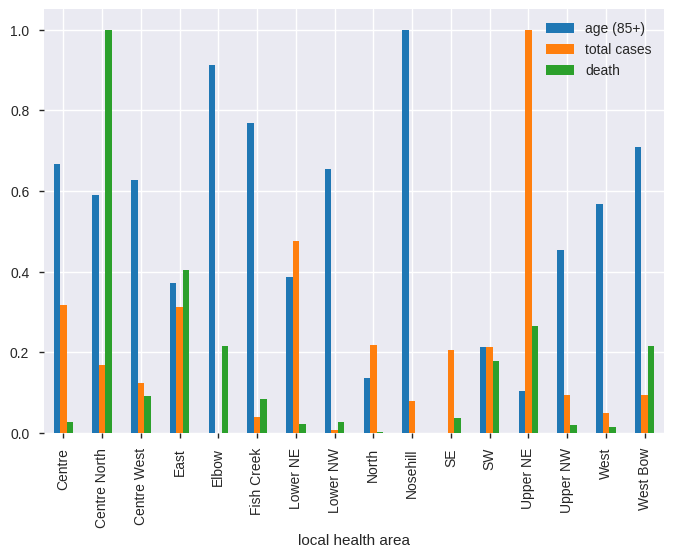

In [ ]:
age=(ratioDF*100).sort_values(by=['age (85+)','total cases','death']).head(20)
age.loc[:,['age (85+)','total cases',"death"]].head(20)


from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(ratioDF), columns=ratioDF.columns, index=ratioDF.index)
df_norm
plt.figure()
df_norm.loc[:,[ 'age (85+)','total cases',"death"]].plot(kind="bar")